In [1]:
#imports libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.signal as sps
import scipy.fftpack as spf

In [2]:
#import database
data = pd.read_csv('samples.csv', delimiter =',')
data.head()

,'Time and date','EEG Fp1','EEG Fp2','EEG F3','EEG F4','EEG F7','EEG F8','EEG T3','EEG T4','EEG C3',...,'EEG P3','EEG P4','EEG O1','EEG O2','EEG Fz','EEG Cz','EEG Pz','EEG A2-A1','ECG ECG','EDF Annotations'
0,'hh:mm:ss.mmm dd/mm/yyyy','uV','uV','uV','uV','uV','uV','uV','uV','uV',...,'uV','uV','uV','uV','uV','uV','uV','uV','mV',''
1,'[00:00:00.000 01/01/2011]',-3.648,-3.581,-4.082,-0.237,-3.46,-1.022,-1.619,4.479,-1.958,...,1.077,7.087,4.313,10.168,-0.228,0.359,2.822,1.291,0.005,0.376
2,'[00:00:00.002 01/01/2011]',-4.236,-4.279,-4.767,-0.617,-3.709,-1.309,-0.877,5.607,-1.428,...,2.963,9.16,6.237,12.274,-0.603,4.161,5.311,0.973,0.002,0.376
3,'[00:00:00.004 01/01/2011]',-4.954,-5.02,-5.784,-1.193,-3.903,-1.524,0.172,7.056,-0.865,...,5.319,11.769,8.766,14.835,-1.163,8.862,8.367,0.579,-0.003,0.376
4,'[00:00:00.006 01/01/2011]',-5.704,-5.655,-7.08,-1.928,-4.019,-1.548,1.454,8.67,-0.37,...,7.871,14.623,11.722,17.598,-1.883,13.7,11.597,0.183,-0.01,0.376


In [4]:
#data preprocessing of database
x=[]
i=1
while(i<=21):
    x.append(data.iloc[1:,i].values) 
    i= i+1
print(np.shape(x))
x_new = np.ravel(x)#making 21X30000 to 1X630000
for j in range(630000):#converting each element of our daat file into float
     if x_new[j] == '-' or x_new[j] =='+':
         x_new[j] = 0
     else:
         x_new[j]= float(x_new[j])
print(np.shape(x_new))

(21, 30000)
(630000,)


In [6]:
#preprocessing for putting a fir filter 
sample_rate = 500
numtaps , beta = sps.kaiserord(60, 0.05)

hn = sps.firwin(numtaps =513, cutoff = 20, window = ('kaiser',8.856 ), fs = sample_rate)
#hn = sps.firwin(numtaps = 47 , cutoff = 20, fs = sample_rate)
fft_hn = spf.fft(hn)
print(fft_hn)

[ 1.00000000e+00+0.00000000e+00j -9.99991944e-01-6.12398951e-03j
  9.99924852e-01+1.22476166e-02j -9.99842227e-01-1.83710552e-02j
  9.99699397e-01+2.44933849e-02j -9.99542860e-01-3.06153825e-02j
  9.99323602e-01+3.67354540e-02j -9.99093982e-01-4.28551511e-02j
  9.98797398e-01+4.89719677e-02j -9.98495814e-01-5.50885492e-02j
  9.98120688e-01+6.12010609e-02j -9.97748615e-01-6.73137746e-02j
  9.97293517e-01+7.34208701e-02j -9.96852156e-01-7.95289942e-02j
  9.96317547e-01+8.56296671e-02j -9.95801488e-01-9.17319227e-02j
  9.95208287e-01+9.78271600e-02j -9.94562005e-01-1.03916924e-01j
  9.92840732e-01+1.09887586e-01j -9.43328767e-01-1.10259320e-01j
  7.00802805e-01+8.62655925e-02j -3.05996141e-01-3.95704755e-02j
  5.48107897e-02+7.42950911e-03j -1.40059727e-03-1.98590735e-04j
  3.03438787e-05+4.49218739e-06j  3.58234535e-06+5.52779383e-07j
 -9.60933225e-06-1.54308910e-06j -1.30647810e-05-2.18012636e-06j
 -1.30844151e-05-2.26584769e-06j -1.20308816e-05-2.15937334e-06j
 -1.07376265e-05-1.995203

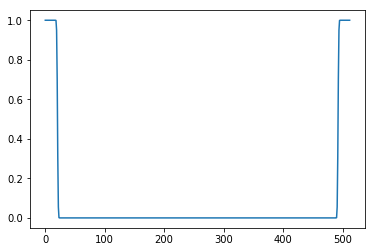

In [7]:
#ploting a graph of fft filter
plt.figure('hn')
plt.plot(np.absolute(fft_hn))

In [9]:
#Appling fir filter
yn = sps.lfilter(b=hn , a=1 , x=x_new)#yn is output signal
print(yn)

[-4.741108662835e-06 -1.0761379041302091e-05 -1.791528487546498e-05 ...
 -0.010395933048009348 -0.005069954862685571 6.0906756168717746e-05]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


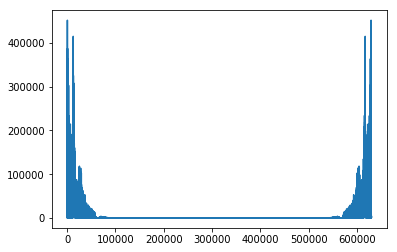

In [10]:
#ploting input frequency curve
fft_input = spf.fft(x_new)
plt.figure('input and output frequecy')
plt.plot(np.absolute(fft_input))

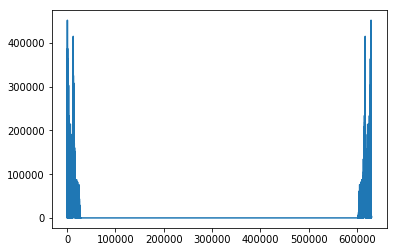

In [11]:
#ploting output frequency curve
fft_output = spf.fft(yn)#extracting output frequency from yn
plt.plot(np.absolute(fft_output))

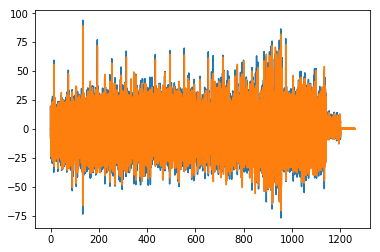

In [12]:
#ploting output signal curve with input signal
t= np.arange(630000)/sample_rate
delay=((0.15*(numtaps-1))/sample_rate)
plt.figure('output with input signal')
plt.plot(t,x_new)
plt.plot(t-delay,yn)

In [13]:
fk=data.iloc[1:,0].values
lk=data.iloc[1:,22].values

d=open('samples.csv','r')
file = open('juiytr.csv','w')
file.write(d.readline()) 
file.write(d.readline())
for i in range(30000):
    gr=[fk[i]]
    for j in range(21):
        gr.append(yn[i+j*30000])
    gr.append(lk[i])
    file.write('{0},{1},{2},{3},{4},{5},{6},{7},{8},{9},{10},{11},{12},{13},{14},{15},{16},{17},{18},{19},{20},{21},{22}\n'.format(*gr))

In [14]:
data2 = pd.read_csv('juiytr.csv', delimiter =',')
data.head()

,'Time and date','EEG Fp1','EEG Fp2','EEG F3','EEG F4','EEG F7','EEG F8','EEG T3','EEG T4','EEG C3',...,'EEG P3','EEG P4','EEG O1','EEG O2','EEG Fz','EEG Cz','EEG Pz','EEG A2-A1','ECG ECG','EDF Annotations'
0,'hh:mm:ss.mmm dd/mm/yyyy','uV','uV','uV','uV','uV','uV','uV','uV','uV',...,'uV','uV','uV','uV','uV','uV','uV','uV','mV',''
1,'[00:00:00.000 01/01/2011]',-3.648,-3.581,-4.082,-0.237,-3.46,-1.022,-1.619,4.479,-1.958,...,1.077,7.087,4.313,10.168,-0.228,0.359,2.822,1.291,0.005,0.376
2,'[00:00:00.002 01/01/2011]',-4.236,-4.279,-4.767,-0.617,-3.709,-1.309,-0.877,5.607,-1.428,...,2.963,9.16,6.237,12.274,-0.603,4.161,5.311,0.973,0.002,0.376
3,'[00:00:00.004 01/01/2011]',-4.954,-5.02,-5.784,-1.193,-3.903,-1.524,0.172,7.056,-0.865,...,5.319,11.769,8.766,14.835,-1.163,8.862,8.367,0.579,-0.003,0.376
4,'[00:00:00.006 01/01/2011]',-5.704,-5.655,-7.08,-1.928,-4.019,-1.548,1.454,8.67,-0.37,...,7.871,14.623,11.722,17.598,-1.883,13.7,11.597,0.183,-0.01,0.376
